In [67]:
#Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Data Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, plot_confusion_matrix

#ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

#Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
# Import dataset (http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data)
cols=['age','workclass','fnlwgt','education','educ_num','marital_status','occupation','relationship','race','sex','cap_gain','cap_loss','hrs_per_week','country','income']
df=pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data', header=None,names=cols)
df.head(5)

,age,workclass,fnlwgt,education,educ_num,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hrs_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.to_csv('Census_Income_Raw.csv')

In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
educ_num          32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
cap_gain          32561 non-null int64
cap_loss          32561 non-null int64
hrs_per_week      32561 non-null int64
country           32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#df.describe(include='all')
df.describe()

,age,fnlwgt,educ_num,cap_gain,cap_loss,hrs_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
for i in df.columns:
    print('>>>',i,'>>>',df[i].unique())

>>> age >>> [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
>>> workclass >>> [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
>>> fnlwgt >>> [ 77516  83311 215646 ...  34066  84661 257302]
>>> education >>> [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
>>> educ_num >>> [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
>>> marital_status >>> [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
>>> occupation >>> [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' 

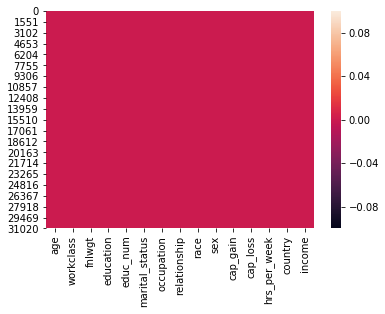

In [8]:
sns.heatmap(df.isnull())

Data isn't showing any null values. But, if we look closely with the values in the dataset, we can see few ' ?' and unusual values. We will need to process them into realistic values or drop all unnecessary ones

In [9]:
# Categorical data is having spaces in front of the values. Let's strip all leading and trailing spaces using .str.strip()
for i in df.columns:
    if df[i].dtypes=='O':
        df[i]=df[i].str.strip()

In [10]:
# Converting target values to 0 and 1 using .map (Don't run this multiple times as it will replace all other values to NaN)
df['income']=df['income'].map({'<=50K':0,'>50K':1})

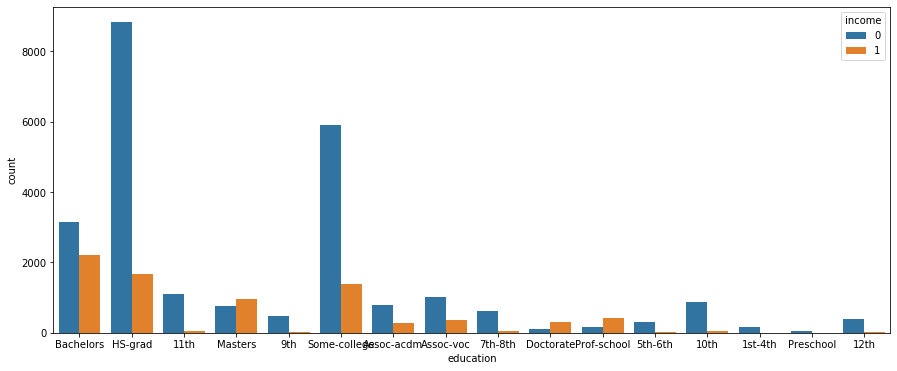

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(x='education', data=df,hue='income')

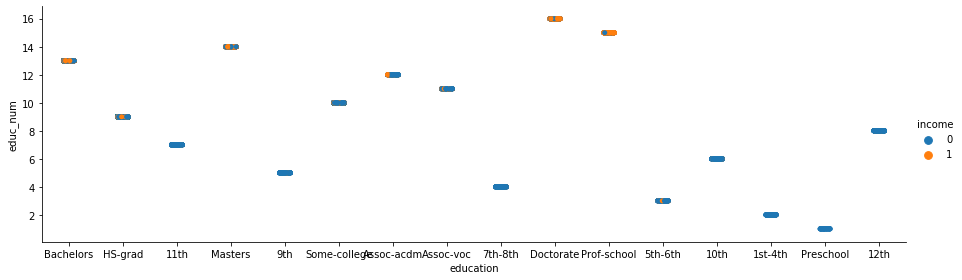

In [12]:
sns.catplot(x='education',y='educ_num',data=df,hue='income',height=4, aspect=3.2)

In [13]:
df['educ_num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: educ_num, dtype: int64

'educ_num' takes the same data as education. We can categorize education as follows: >> '11th' '12th' - 'HS' >> '9th' '10th' - '9&10' >> 'Preschool' '1st-4th' '5th-6th' '7th-8th' - 'till8'

In [14]:
df['education'].replace({'11th':'HS','12th':'HS','9th':'9&10','10th':'9&10','Preschool':'till8','1st-4th':'till8','5th-6th':'till8','7th-8th':'till8'},inplace=True)
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
HS               1608
9&10             1447
Assoc-voc        1382
till8            1198
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64

In [15]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

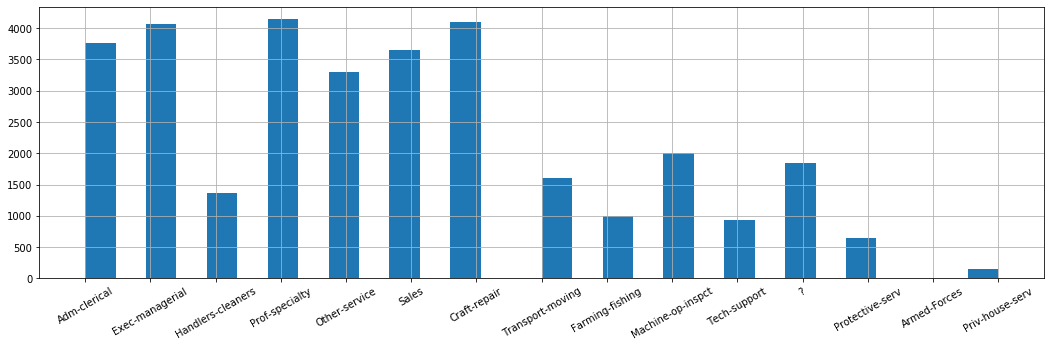

In [16]:
df['occupation'].hist(figsize=(18,5),bins=30)
plt.xticks(rotation=30)

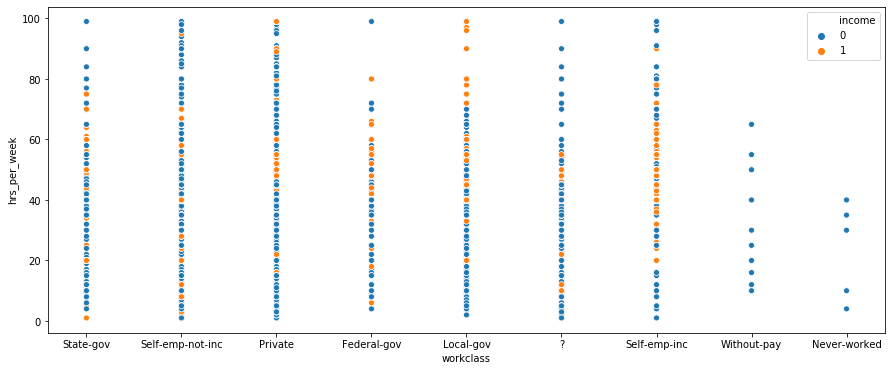

In [17]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='workclass',y='hrs_per_week',hue='income',data=df)

The category 'Never-worked' must never have an income nor should they have hrs_per_week. So we can remove the 'Never-worked' from dataset as we won't have an income to classify.

Similarly, category 'Without-pay' must never have a income. So we can remove the 'Without-pay' from dataset as we won't have an income to classify.

In [18]:
#Removing all unwated data before proceeding with further data cleansing
a=df[df['occupation']!='?']
print('After occupation --->', a.shape)
a=a[a['workclass']!='Without-pay']
a=a[a['workclass']!='?']
a=a[a['workclass']!='Never-worked']
print('After workclass --->',a.shape)
a=a[a['race']!='Other']
print('After race --->',a.shape)
df=a[a['country']!='?']
print('After country --->',df.shape)

After occupation ---> (30718, 15)
After workclass ---> (30704, 15)
After race ---> (30456, 15)
After country ---> (29917, 15)


In [19]:
# Merge common values in 'workclass'
df['workclass'].replace({'Self-emp-not-inc':'Self-employed','Self-emp-inc':'Self-employed','Local-gov':'Gov-emp','State-gov':'Gov-emp','Federal-gov':'Gov-emp'},inplace=True)
df['workclass'].value_counts()

Private          22082
Gov-emp           4273
Self-employed     3562
Name: workclass, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001062FB08>,
      dtype=object)

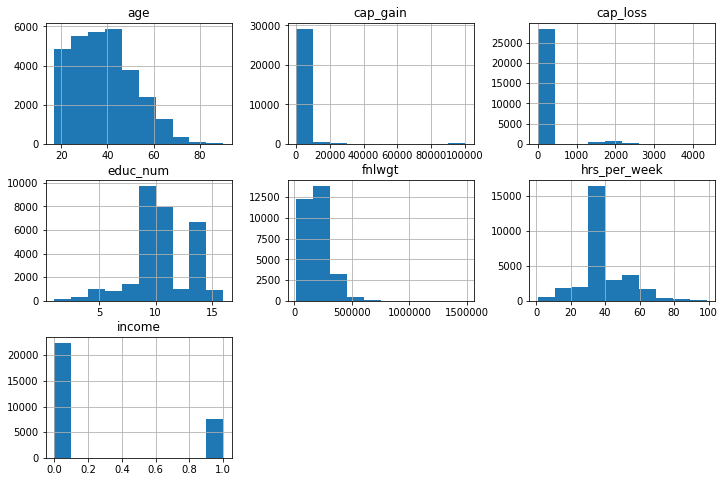

In [20]:
df.hist(figsize=(12,8))

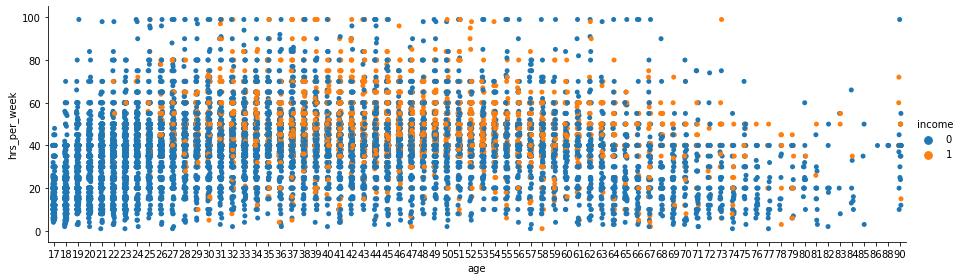

In [21]:
sns.catplot(x='age',y='hrs_per_week',data=df,hue='income',height=4, aspect=3.2)

In [22]:
a=df[df['age']>85]
a['age'].value_counts()

90    35
88     3
86     1
Name: age, dtype: int64

In [23]:
a=df[(df['age']==90) & (df['hrs_per_week']>40)]
a.loc[:,['age','hrs_per_week']]

,age,hrs_per_week
1935,90,45
5370,90,60
5406,90,50
6232,90,50
8806,90,72
10545,90,50
11996,90,55
15356,90,99


It's not possible to work for more than 40 hrs per week at an age of 90. Hence, we can remvove theses from the data set

In [24]:
print('Initial Dataset Shape --->', df.shape)
b=list(a.index)
df.drop(axis='index',index=b,inplace=True)
print('Final Dataset Shape --->', df.shape)

Initial Dataset Shape ---> (29917, 15)
Final Dataset Shape ---> (29909, 15)


In [25]:
df['marital_status'].value_counts()

Married-civ-spouse       13960
Never-married             9636
Divorced                  4191
Separated                  926
Widowed                    820
Married-spouse-absent      355
Married-AF-spouse           21
Name: marital_status, dtype: int64

In [26]:
Married=['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
Separated=['Separated','Divorced']
df['marital_status'].replace(to_replace=Married,value='Married',inplace=True)
df['marital_status'].replace(to_replace=Separated,value='Separated',inplace=True)
df['marital_status'].value_counts()

Married          14336
Never-married     9636
Separated         5117
Widowed            820
Name: marital_status, dtype: int64

In [27]:
df['relationship'].value_counts()

Husband           12381
Not-in-family      7666
Own-child          4432
Unmarried          3174
Wife               1392
Other-relative      864
Name: relationship, dtype: int64

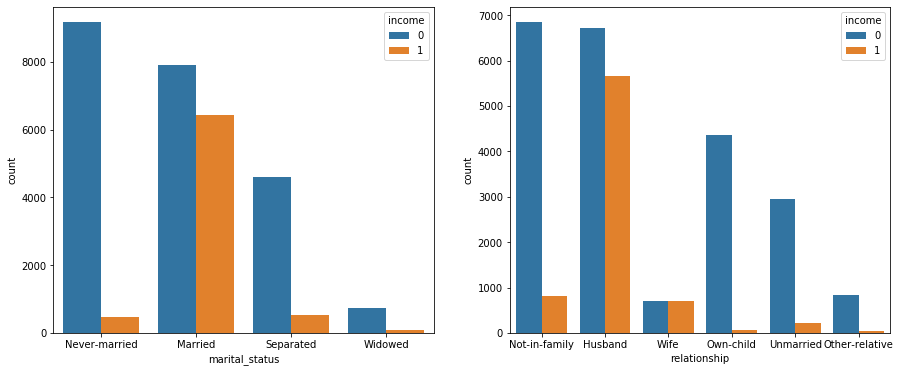

In [28]:
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1,2,1)
sns.countplot('marital_status',data=df,hue='income')

ax = fig.add_subplot(1,2,2)
sns.countplot('relationship',data=df,hue='income')

Text(0, 0.5, '% of People')

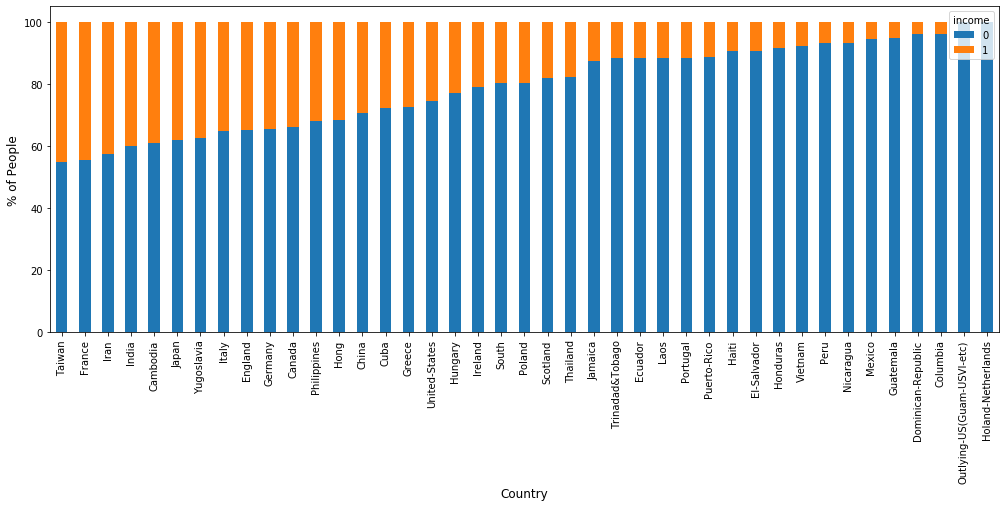

In [29]:
tbl=pd.crosstab(df['country'], df['income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(17,6))
plt.xlabel('Country',fontsize=12)
plt.ylabel('% of People',fontsize=12)

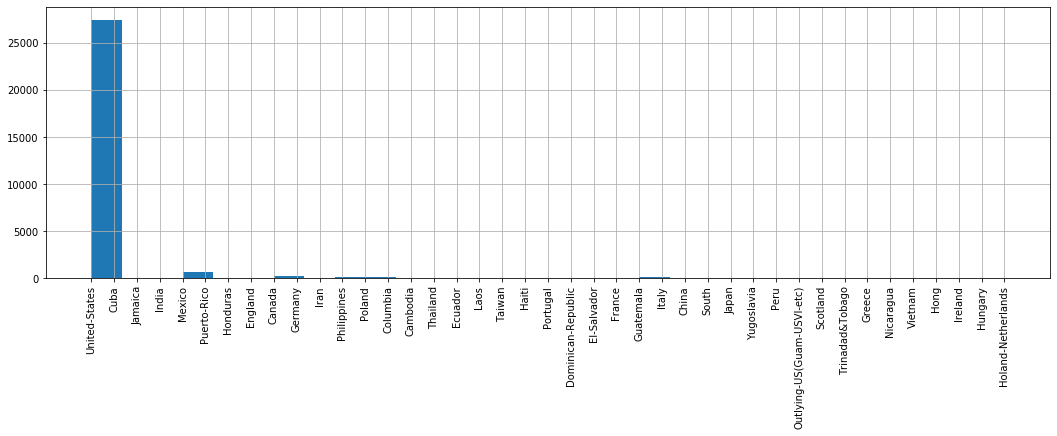

In [30]:
plt.xticks(rotation='vertical')
df['country'].hist(figsize=(18,5),bins=30)

In [31]:
df[df['country']!='United-States'].shape

(2538, 15)

Majority of data is of 'United States'. 70% of the people earn less that 50k.

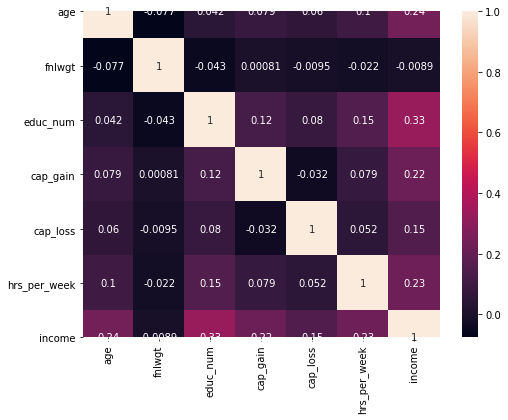

In [32]:
fig = plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot = True)

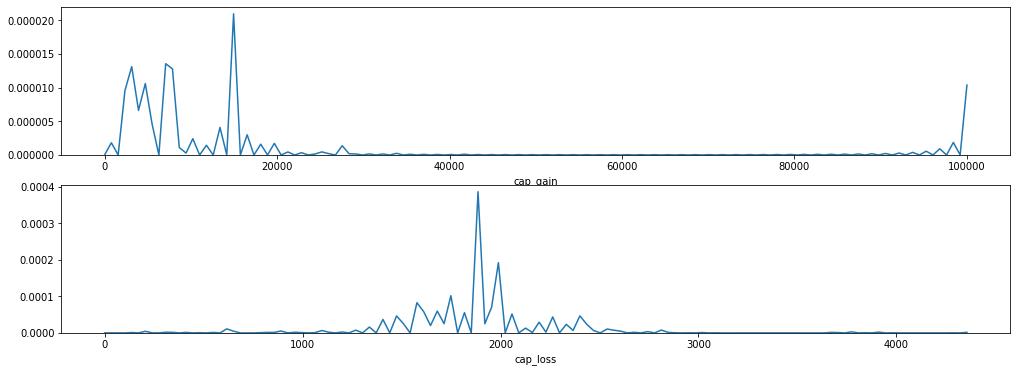

In [33]:
fig = plt.figure(figsize=(17,6))
ax = fig.add_subplot(2,1,1)
sns.distplot(df['cap_gain'],bins=1,hist=False)

ax = fig.add_subplot(2,1,2)
sns.distplot(df['cap_loss'],bins=1,hist=False)

Clearly, 'cap_gain' has lot of outliers towards the value 100000

In [34]:
(df['cap_gain']>80000).value_counts()

False    29763
True       146
Name: cap_gain, dtype: int64

In [35]:
# There are 146 rows with 'cap_gain' > 80000. We can delete them as they seem to be clear outliers.
print('# of rows before removal --->', df.shape[0])
df=df[df['cap_gain']<80000]
print('# of rows after removal --->', df.shape[0])

# of rows before removal ---> 29909
# of rows after removal ---> 29763


In [36]:
print('# Number of unique items in each column')
for i in df.columns:
    print(i,'---->',df[i].nunique())

# Number of unique items in each column
age ----> 72
workclass ----> 3
fnlwgt ----> 20007
education ----> 11
educ_num ----> 16
marital_status ----> 4
occupation ----> 14
relationship ----> 6
race ----> 4
sex ----> 2
cap_gain ----> 117
cap_loss ----> 90
hrs_per_week ----> 94
country ----> 41
income ----> 2


In [37]:
#separating categorical and numberical features
cat1_col,cat2_col,num_col=[],[],[]
for i in df.columns:
    if df[i].dtypes == 'O':
        if df[i].nunique() > 2:
            cat2_col.append(i)
        else:
            cat1_col.append(i)
    else:
        num_col.append(i)
print('Categorical Data ->',cat1_col,' & ',cat2_col)
print('Numerical Data ->',num_col)

Categorical Data -> ['sex']  &  ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'country']
Numerical Data -> ['age', 'fnlwgt', 'educ_num', 'cap_gain', 'cap_loss', 'hrs_per_week', 'income']


In [38]:
# Splitting x and y
x=df.drop('income',axis=1)
y=df['income']

In [39]:
print('# of dummy columns created -> ', pd.get_dummies(x[cat2_col]).shape[1])
x=pd.get_dummies(x)
print('# of total columns in x -> ', x.shape[1])

# of dummy columns created ->  83
# of total columns in x ->  91


In [40]:
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(x)

## Machine Learning Algorithms

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print('x_train.shape: ',x_train.shape,'x_test.shape:',x_test.shape,'\ny_train.shape:',y_train.shape,'y_test.shape:',y_test.shape)

x_train.shape:  (23810, 91) x_test.shape: (5953, 91) 
y_train.shape: (23810,) y_test.shape: (5953,)


In [42]:
# Instantiate all models
logr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier()
bgc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()

In [43]:
models={'Logistic Regression':logr,
        'Gaussian NB':gnb,
        'Support Vector Machine':svc,
        'KNeighbors Classifier':knn,
        'Decision Tree Classifier':dtc,
        'XGB Classifier':xgb,
        'Random Forest Classifier':rf,
        'Bagging Classifier':bgc,
        'Extra Trees Classifier':etc,
        'Gradient Boosting Classifier':gbc
       }

In [44]:
def main(cls):
    a_scores=[]
    for model_name,model in cls.items():
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        score=accuracy_score(y_test,y_pred)
        a_scores.append(score*100)
        print('##############################',model_name,'##############################')
        print('>>> Accuracy Score = %0.2f' %(score*100))
        c_matrix=confusion_matrix(y_test,y_pred)
        print('>>> Confusion Matrix: \n',c_matrix)
        TN,FP,FN,TP=c_matrix[0,0],c_matrix[0,1],c_matrix[1,0],c_matrix[1,1]
        print('>>> Recall Score = %0.2f' %((TP)*100/float(TP+FN)))
        print('>>> Specificity = %0.2f' %(TN*100/float(TN+FP)))
        print('>>> False Positive Rate = %0.2f' %(FP*100/float(FP+TN)))
        print('>>> Precision Score = %0.2f' %(TP*100/float(TP+FP)))
        print('>>> Classification Report:')
        print(classification_report(y_test,y_pred))
    return a_scores

In [45]:
a_scores=main(models)

############################## Logistic Regression ##############################
>>> Accuracy Score = 85.07
>>> Confusion Matrix: 
 [[4212  321]
 [ 568  852]]
>>> Recall Score = 60.00
>>> Specificity = 92.92
>>> False Positive Rate = 7.08
>>> Precision Score = 72.63
>>> Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4533
           1       0.73      0.60      0.66      1420

    accuracy                           0.85      5953
   macro avg       0.80      0.76      0.78      5953
weighted avg       0.84      0.85      0.85      5953

############################## Gaussian NB ##############################
>>> Accuracy Score = 50.13
>>> Confusion Matrix: 
 [[1614 2919]
 [  50 1370]]
>>> Recall Score = 96.48
>>> Specificity = 35.61
>>> False Positive Rate = 64.39
>>> Precision Score = 31.94
>>> Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.36  

In [46]:
p=pd.DataFrame(data=a_scores,columns=['Accuracy Score'], index=list(models.keys())).sort_values(by = 'Accuracy Score', ascending=False)
print(p)

                              Accuracy Score
XGB Classifier                     86.712582
Gradient Boosting Classifier       86.695784
Random Forest Classifier           85.150344
Logistic Regression                85.066353
Bagging Classifier                 84.428019
Support Vector Machine             84.310432
Extra Trees Classifier             83.352931
KNeighbors Classifier              82.311440
Decision Tree Classifier           80.379641
Gaussian NB                        50.125987


Let's take the top 5 models and perform cross validation

In [47]:
new_models={'XGB Classifier':xgb,
            'Gradient Boosting Classifier':gbc,
            'Logistic Regression':logr,
            'Random Forest Classifier':rf,
            'Support Vector Machine':svc
           }

In [48]:
cv_scores=[]
for model_name,model in new_models.items():
    score=cross_val_score(model,x_train,y_train,scoring='accuracy',cv=10)
    cv_scores.append((score.mean())*100)
    print(model_name,' >>> Completed')
print(cv_scores)

XGB Classifier  >>> Completed
Gradient Boosting Classifier  >>> Completed
Logistic Regression  >>> Completed
Random Forest Classifier  >>> Completed
Support Vector Machine  >>> Completed
[86.52666946661067, 85.89668206635868, 84.42671146577068, 84.71650566988659, 84.02771944561108]


In [49]:
pd.DataFrame(data=cv_scores, columns=['New Accuracy Score'], index=list(new_models.keys())).join(p)

,New Accuracy Score,Accuracy Score
XGB Classifier,86.526669,86.712582
Gradient Boosting Classifier,85.896682,86.695784
Logistic Regression,84.426711,85.066353
Random Forest Classifier,84.716506,85.150344
Support Vector Machine,84.027719,84.310432


Our cross_val_score is giving much lower scores compared to accuracy_scores as 'Shuffle=False' by default.
Check out this link for more info: https://stackoverflow.com/questions/43688058/sklearn-cross-val-score-gives-lower-accuracy-than-manual-cross-validation

### Hyperparameter Tuning

In [51]:
# Instantiating with default values
xgb=XGBClassifier()
gbc=GradientBoostingClassifier(random_state=42)
logr=LogisticRegression(random_state=42)
svc=SVC()
rf=RandomForestClassifier(random_state=42)

### GridSearchCV Hyperparameter Tuning

In [52]:
xgb_param = {'learning_rate':[0.1,1],
             'n_estimators':range(50,251,50)
             }

b_xgb=GridSearchCV(xgb,xgb_param)
b_xgb.fit(x_train,y_train)
print('XGB Classifier >>>', b_xgb.best_params_)

XGB Classifier >>> {'learning_rate': 0.1, 'n_estimators': 200}


In [53]:
gbc_param = {'n_estimators':range(20,81,10)}

b_gbc=GridSearchCV(gbc,gbc_param)
b_gbc.fit(x_train,y_train)
print('Gradient Boosting Classifier >>>', b_gbc.best_params_)

Gradient Boosting Classifier >>> {'n_estimators': 80}


In [54]:
logr_param = {'C':[0.1,1,10]}

b_logr=GridSearchCV(logr,logr_param)
b_logr.fit(x_train,y_train)
print('Logistic Regression >>>', b_logr.best_params_)

Logistic Regression >>> {'C': 1}


In [56]:
svc_param={'kernel':['linear','sigmoid','poly','rbf'],'C':[1,10]}

b_svc=GridSearchCV(svc,svc_param)
b_svc.fit(x_train,y_train)
print('Support Vector Machine >>>', b_svc.best_params_)

Support Vector Machine >>> {'C': 1, 'kernel': 'linear'}


In [57]:
rf_param = {'n_estimators':range(50,251,50)}

b_rf=GridSearchCV(rf,rf_param)
b_rf.fit(x_train,y_train)
print('Random Forest Classifier >>>', b_rf.best_params_)

Random Forest Classifier >>> {'n_estimators': 200}


In [61]:
# Instantiating with new parameters
xgb=XGBClassifier(learning_rate=0.1, n_estimators=200)
gbc=GradientBoostingClassifier(random_state=42, n_estimators=80)
logr=LogisticRegression(random_state=42, C=1)
svc=SVC(C=1, kernel='linear')
rf=RandomForestClassifier(random_state=42, n_estimators=200)

In [62]:
new_models={'XGB Classifier':xgb,
            'Gradient Boosting Classifier':gbc,
            'Logistic Regression':logr,
            'Random Forest Classifier':rf,
            'Support Vector Machine':svc
           }

In [63]:
a_scores=[]
for model_name, model in new_models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    a_scores.append(score*100)
    print('##############################',model_name,'##############################')
    print('>>> Accuracy Score = %0.2f' %(score*100))

############################## XGB Classifier ##############################
>>> Accuracy Score = 86.68
############################## Gradient Boosting Classifier ##############################
>>> Accuracy Score = 86.61
############################## Logistic Regression ##############################
>>> Accuracy Score = 85.07
############################## Random Forest Classifier ##############################
>>> Accuracy Score = 85.20
############################## Support Vector Machine ##############################
>>> Accuracy Score = 84.88


In [64]:
pd.DataFrame(data=a_scores, columns=['New Accuracy Score'], index=list(new_models.keys())).join(p)

,New Accuracy Score,Accuracy Score
XGB Classifier,86.678985,86.712582
Gradient Boosting Classifier,86.611792,86.695784
Logistic Regression,85.066353,85.066353
Random Forest Classifier,85.200739,85.150344
Support Vector Machine,84.881572,84.310432


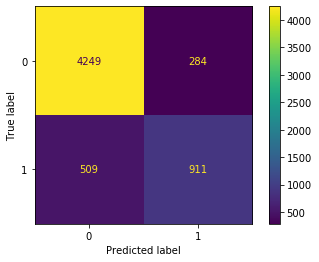

In [73]:
# Plotting Confusion Matrix
xgb.fit(x_train,y_train)
plot_confusion_matrix(xgb, x_test, y_test)

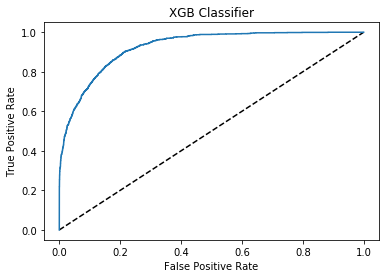

In [74]:
# Plotting ROC Curve for the model
y_pred_prob=xgb.predict_proba(x_test)[:,1]  #1 is the probabilty of threshold value
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGB Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classifier')
plt.show()

In [75]:
#Exporting model as pkl file
joblib.dump(xgb,'XGB_Census_Income.pkl')

['XGB_Census_Income.pkl']